In [66]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
from src.misc import load_processed_dataset, split_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Results

In [67]:
df = load_processed_dataset("aapl")
X = df.drop("Close Forecast", axis=1)
y = df["Close Forecast"]
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'close_t-1', 'close_t-2', 'close_t-3', 'close_t-4',
       'close_t-5', 'pct_change', 'return', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'upper_band',
       'middle_band', 'lower_band', 'SMA_3', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'ADX',
       'aroon_down', 'aroon_up', 'macd', 'macdsignal', 'macdhist', 'RSI_14',
       'slow_k', 'slow_d', 'williams_r', 'AD', 'OBV', 'NATR', 'TRANGE',
       'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI'],
      dtype='object')

R^2: 0.9052672443982556
MSE: 10.864161256797766
RMSE: 3.2960827138889837
MAE: 2.503579518151662
MAPE: 1.7006109697709257


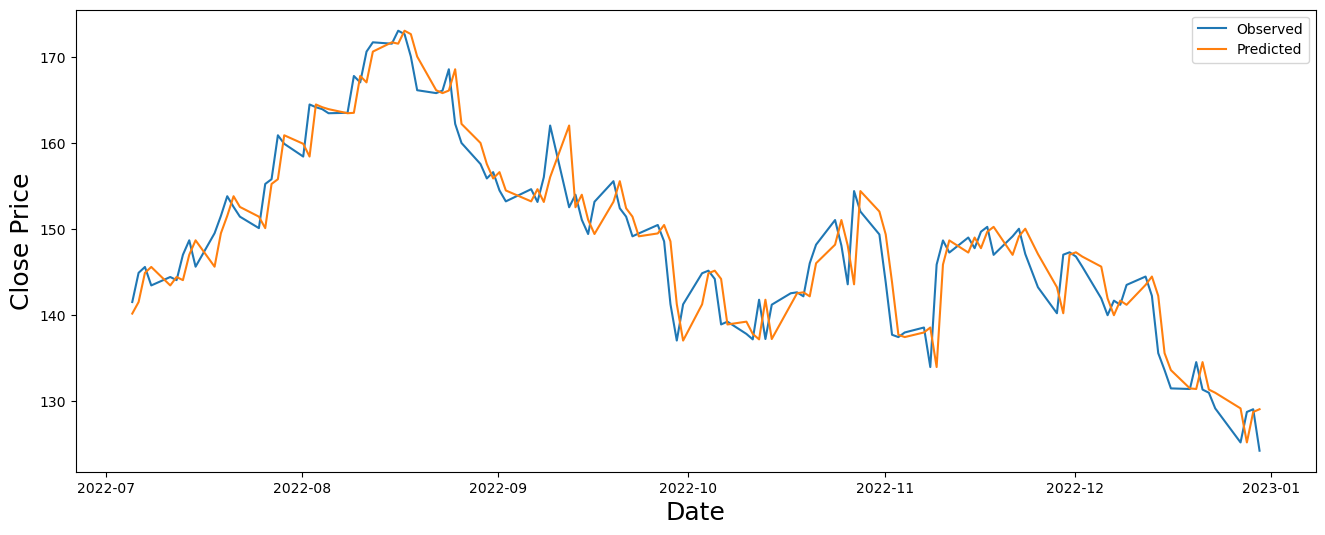

In [68]:
from src.models.Baseline.evaluate import eval
y_pred, y_true = eval()

R^2: 0.9056333181662952
MSE: 10.822179110046045
RMSE: 3.2897080584827045
MAE: 2.5340344129796653
MAPE: 1.7211509227835646


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


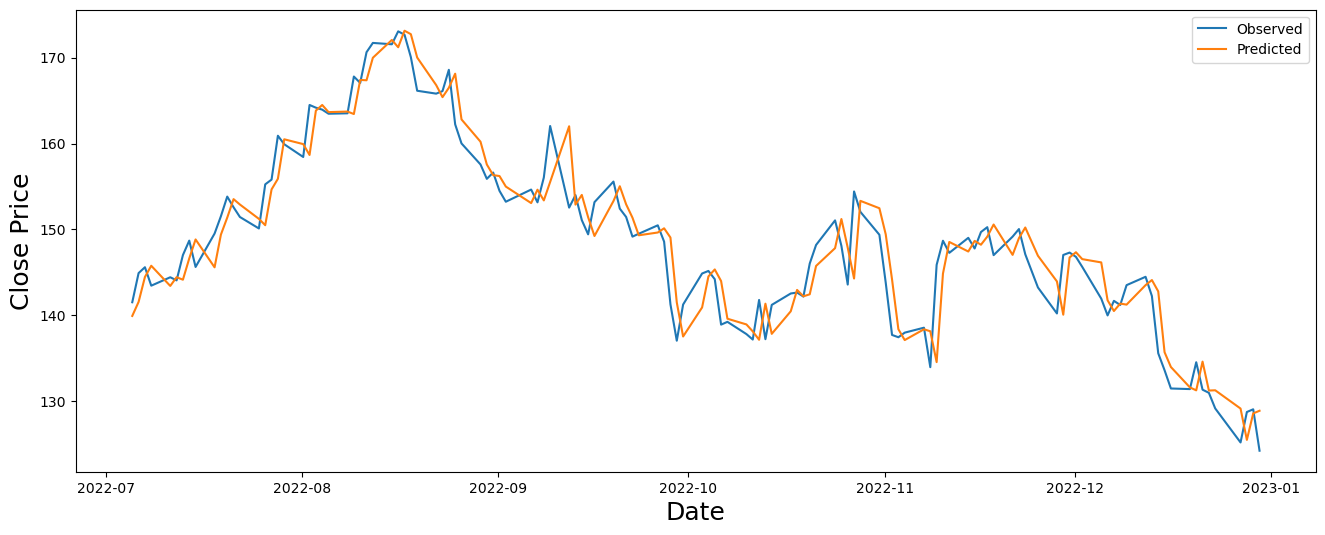

In [76]:
from src.models.ARIMA.evaluate import eval

p, d, q = 2, 1, 3
run_id = "b535292cf0aa4b67aceb43ac213e66f9"
y_pred, y_true = eval(p, d, q, run_id)

R^2: 0.9078523266208008
MSE: 10.567698328537958
RMSE: 3.2507996444779486
MAE: 2.490126095392523
MAPE: 1.6925034777522558


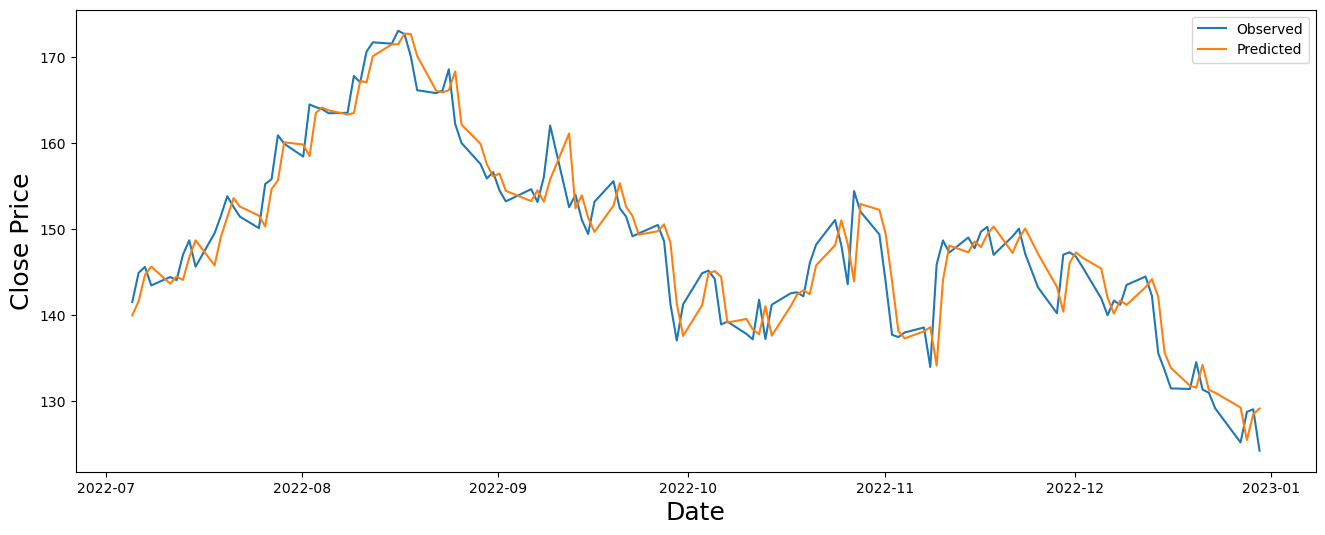

In [72]:
from src.models.Linear.evaluate import eval
run_id = "59ee53bdc13b4141b7b2acc273d0879f"
features = ['Close', 'High', 'RSI_14', 'TRANGE', '^FTSE', 'close_t-1', 'close_t-4', 'macdsignal']
y_pred, y_true = eval(run_id, features)

R^2: 0.7906527918338142
MSE: 24.28214874300259
RMSE: 4.927692030048407
MAE: 3.952611267325652
MAPE: 2.665748714386556


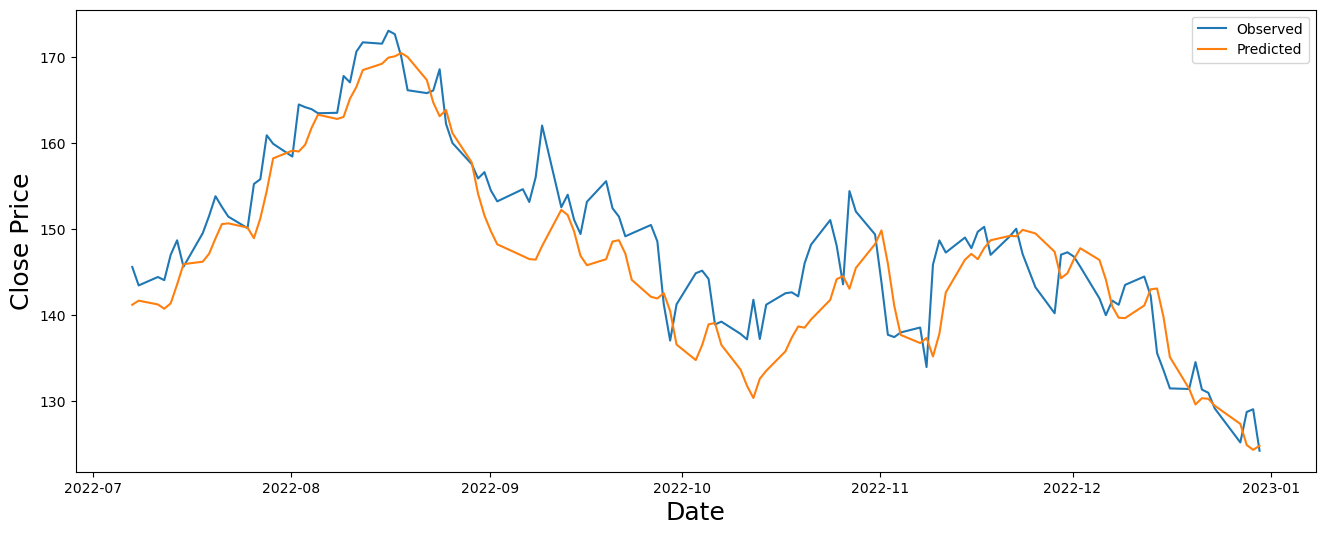

In [74]:
from src.models.LSTM.evaluate import eval
features = ['Close', 'Volume', 'upper_band', 'middle_band', 'lower_band', 'SMA_3', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'ADX', 'aroon_down', 'aroon_up', 'macd', 'macdsignal', 'macdhist', 'RSI_14', 'slow_k', 'slow_d', 'williams_r', 'AD', 'OBV', 'NATR', 'TRANGE', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']
sequence_len = 3
run_id='157cc5c7f0114fe389ee9b8b049f465e'
y_pred, y_true = eval(features, sequence_len, run_id)

R^2: -0.3935329881904901
MSE: 160.50989
RMSE: 12.66925
MAE: 10.270969
MAPE: 6.697763502597809


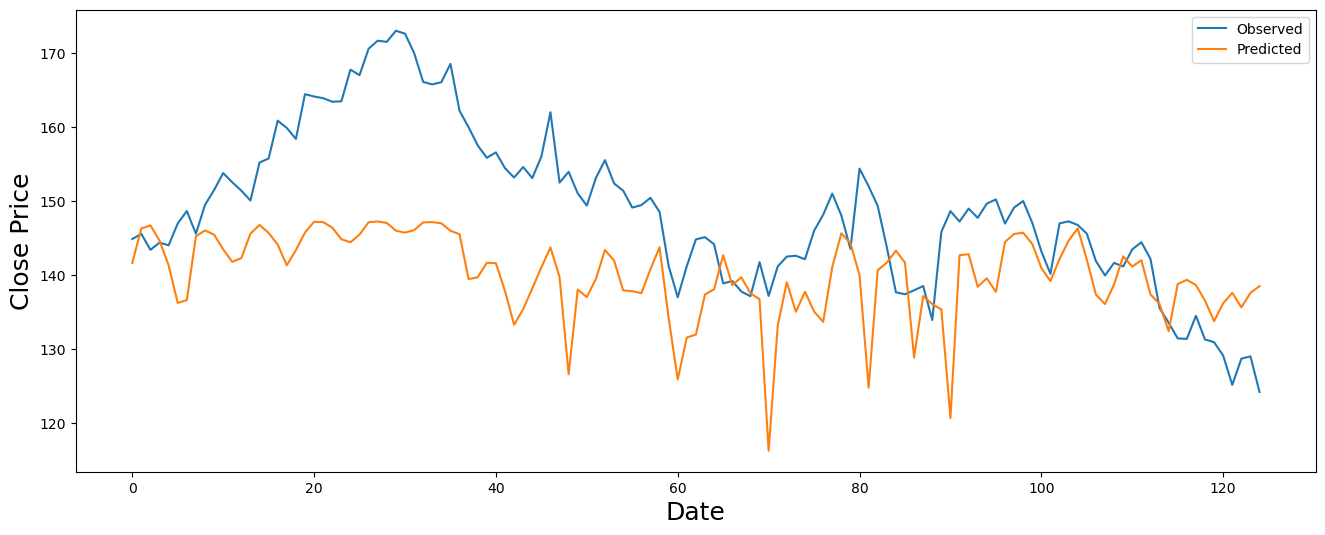

In [79]:
from src.models.Transformer.evaluate import eval
features = ['Close', 'williams_r', 'aroon_down', 'aroon_up', 'TRANGE', 'RSI_14', 'OBV', 'AD']
sequence_len = 10
run_id='f7e4dd1a39d040b88f5424d88f148e4c'
y_pred, y_true = eval(features, sequence_len, run_id)